![image](img1.png)

Vous allez trouver la suite ici: [Notebook Online](https://machinelearning-dgrinderhz.notebooks.azure.com/j/notebooks/Master%20MST%20SIDI%20-%20FST%20Errachidia/TP%204/TP%204%20Notebook.ipynb)

# Partie 1 : Extraction de caractéristiques simples 
La problématique ici est de faire le lien entre ce que vous connaissez en image et ce qu'il vous
est raconté en Classification (il est temps!). En effet, jusqu'à présent, tous les algorithmes
d'apprentissage que nous avons vu requièrent les données sous formes de vecteurs. Or notre but
est de faire de la classification d'images, c'est à dire d'un tenseur d'ordre 3 (3 matrices de
couleurs si vous préférez). Dans cette partie nous allons voir plusieurs approches permettant de
passer d'une image à un vecteur.

### Question 0 
Dans un premier temps, il vous faut des images ! Créer donc un répertoire et mettez y quelques
images de chiens et quelques images de chats : le but ultime du TP est d'apprendre un classifieur
distinguant les 2 espèces. Le code python suivant permet d'ouvrir une image et de l'afficher :

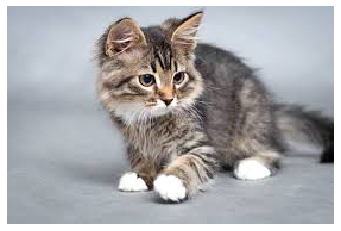

In [27]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
#ouverture d’une image couleur
im = imread('images/chat1.jpg')
"""Affchage en utilisant une figure de matplotlib"""
plt.imshow(im)
#Suppresssion des axes
plt.axis('off')
#affchage
plt.show() 

### Question 1 
La première vectorisation d'une image sera la plus simple : nous allons juste prendre l'image et
l'aplatir en un vecteur. La seule difficulté est que l'on a des images de tailles différentes alors
que l'on a besoin de vecteurs de taille identique : il faut redimensionner chaque image.
Ecrire une fonction aplatir(image) qui prend une image au format renvoyé par imread, la
redimensionne au format (32,32) et en fait un vecteur. Vous pouvez utiliser vos outils préférés,
mais les fonctions resize(image, shape) et fatten() de opencv peuvent s'avérer très utiles
(normalement la commande import cv2 suffit pour pouvoir utiliser opencv en python).

In [28]:
from numpy import resize, shape
def applatir(image):
    image = resize(image, (32, 32))
    return image.flatten()

### Question 2 
Dans cette question, nous allons représenter chaque image par un histogramme de couleur.
Ecrire une fonction histogramme(image) qui prend une image et retourne un vecteur contenant
l'histogramme de couleur. Encore une fois, vous pouvez utiliser les outils que vous voulez, mais
les fonctions opencv cvtColor(image, cv2.COLOR_BGR2HSV) qui renvoie une description
HSV d'une image, et calcHist([hsv], channels, mask, histSize, ranges)1 qui construit
l'histogramme à partir d'un HSV, peuvent s'avérer utiles, tout comme la fonction normalize(hist)
qui normalise un histogramme (penser aussi à fatten() pour avoir un vecteur…).

In [29]:
import cv2
import os

In [30]:
def histogramme(image):
    resized = cv2.resize(image, (32, 32))
    bins=(8, 8, 8)
    hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0,1,2], None, bins, [0, 180, 0, 256, 0, 265])
    cv2.normalize(hist, hist)
    return hist.flatten()

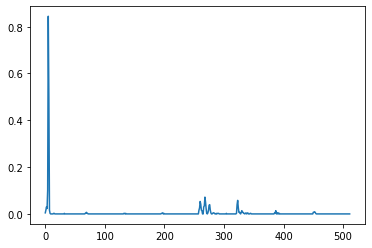

In [31]:
HSVhist = histogramme(im)
plt.plot(HSVhist)
plt.show()

### Question 3
Ecrire une fonction images_en_vecteur_naif(chemin) qui prend le chemin vers le dossier
contenant les images, les ouvre les unes après les autres, les transforme chacune en un vecteur
en utilisant la fonction de la question 1, et retourne un arrayXcorrespondant et un vecteur y au
format nécessaire à scikit-learn.
Le code ci-dessous permet de récupérer un à un les noms des fichiers d'un répertoire ainsi que
leur index :

In [32]:
'''
import os
fchiers = os.listdir("chemin_du_repertoir")
for fchier in fchiers:
    #traitement à appliquer à chaque image
'''   

'\nimport os\nfchiers = os.listdir("chemin_du_repertoir")\nfor fchier in fchiers:\n    #traitement à appliquer à chaque image\n'

Pour le calcul du vecteur y, une possibilité est de donner le numéro de la classe dans le nom du
fichier. Par exemple, si on suppose que la classe 0 est celle des chiens et la classe 1 celle des
chats, toutes les images de chiens peuvent commencer par "0." et celles de chats par "1."
(l'utilisation alors de la fonction str.startswith(str2), qui teste si la chaine de caractères str
commence par la chaine str2, faciliterait la construction)

In [33]:
import os
path = 'images/'
images = ['images/{}'.format(i) for i in os.listdir(path)]
np.shape(images)

(1455,)

In [34]:
def images_en_vecteur_naif(images):
    x = []
    y = []
    for image in images:
        x.append(applatir(cv2.imread(image)))
        if 'chat' in image:
            y.append(1)
        elif 'chien' in image:
            y.append(0)
    return x, y

In [35]:
# test de la fonction
X_naif, y_naif = images_en_vecteur_naif(images)
X_naif = np.array(X_naif)
y_naif = np.array(y_naif)
#y_naif = np.array(y_naif)
#y_naif = y_naif.reshape(y_naif.size, 1)
#transformation de la liste obtenu en matrice

### Question 4

Ecrire une fonction images_en_vecteur(chemin) qui prend le chemin vers le dossier contenant
les images, les ouvre les unes après les autres, les transforme chacune en un vecteur en utilisant
la fonction de la question 2, et retourne un arrayXcorrespondant et un vecteur y au format
nécessaire à scikit-learn.

In [36]:
def images_en_vecteur(images):
    x = []
    y = []
    for image in images:
        x.append(histogramme(cv2.imread(image)))
        if 'chat' in image:
            y.append(1)
        elif 'chien' in image:
            y.append(0)
    return x, y

In [37]:
#test de la fonction
X_hist, y_hist = images_en_vecteur(images)
X_hist = np.array(X_hist)
y_hist = np.array(y_hist)

### Question 5 

Ecrire une fonction images_en_vecteur_complet(chemin) qui prend le chemin vers le dossier
contenant les images, les ouvre les unes après les autres, les transforme chacune en un vecteur
composer par le vecteur obtenu en utilisant la fonction de la question 1 concaténé avec celui
obtenu par celle de la question 2, et retourne un arrayXcorrespondant et un vecteur y au format
nécessaire à scikit-learn.

In [38]:
def images_en_vecteur_complet(images):
    x = []
    y = []
    for image in images:
        vect1 = applatir(cv2.imread(image))
        vect2 = histogramme(cv2.imread(image))
        x.append(np.concatenate((vect1, vect2), axis=0))
        if 'chat' in image:
            y.append(1)
        elif 'chien' in image:
            y.append(0)
    return x, y

In [39]:
#test de la fonction
X_complet, y_complet = images_en_vecteur_complet(images)
X_complet = np.array(X_complet)
y_complet = np.array(y_complet)

# Partie 2 : Sélection d'attributs / Réduction de dimension 

Normalement vous savez tous ce qu'est une ACP (Analyse en Composantes principales). Pour
les poissons rouges : une PCA (Principal Components Analysis) est réalisée à l'aide d'une
combinaison linéaire des attributs originaux en utilisant une décomposition en valeurs propres
(en fait singulières...) troncatée. Il s'agit de décomposer une matrice X pour projeter les données
sur une base des principaux vecteurs propres (singuliers). En scikit-learn, on fait ça comme ça:

In [40]:
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)
#Cela nous transforme les données en 2 dimensions :
X_pca = pca.transform(X)
'''

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=2, whiten=True).fit(X)\n#Cela nous transforme les données en 2 dimensions :\nX_pca = pca.transform(X)\n'

### Question 0 (deja fait en haut)

Générer les matrices X_naif, X_hist, X_complet et les vecteurs y_naif, y_hist, y_complet en
utilisant les fonctions de la première partie.

In [41]:
print(X_naif)
print("Its shape is :",np.shape(X_naif))

[[246 248 248 ... 236 232 235]
 [140 149 162 ... 236 250 226]
 [210 239 246 ...  58  61  28]
 ...
 [140 149 162 ... 236 250 226]
 [214 197 188 ... 157 148 118]
 [210 239 246 ...  58  61  28]]
Its shape is : (1455, 1024)


In [42]:
X_naif[0]

array([246, 248, 248, ..., 236, 232, 235], dtype=uint8)

In [43]:
print(y_naif)
print("Its shape is :",np.shape(y_naif))

[1 0 0 ... 0 1 0]
Its shape is : (1455,)


In [44]:
print(X_hist)
print("Its shape is :",np.shape(X_hist))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00578586 0.00578586 0.00578586 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00597337 0.03584022 ... 0.         0.         0.        ]
 [0.00578586 0.00578586 0.00578586 ... 0.         0.         0.        ]]
Its shape is : (1455, 512)


In [45]:
print(y_hist)
print("Its shape is :",np.shape(y_hist))

[1 0 0 ... 0 1 0]
Its shape is : (1455,)


In [46]:
print(X_complet)
print("Its shape is :",np.shape(X_complet))

[[246. 248. 248. ...   0.   0.   0.]
 [140. 149. 162. ...   0.   0.   0.]
 [210. 239. 246. ...   0.   0.   0.]
 ...
 [140. 149. 162. ...   0.   0.   0.]
 [214. 197. 188. ...   0.   0.   0.]
 [210. 239. 246. ...   0.   0.   0.]]
Its shape is : (1455, 1536)


In [47]:
print(y_complet)
print("Its shape is :",np.shape(y_complet))

[1 0 0 ... 0 1 0]
Its shape is : (1455,)


### Question 1

En utilisant la fonction PCA de scikit learn, pour chacune des matrices précédentes, générer les
matrices de données obtenables par ACP en réduisant les nombre d'attributs de 20 %, 40 %, et
60 % . Vous devez donc construire X_naif_ACP20, X_naif_ACP40, X_naif_ACP60,
X_hist_ACP20, etc.
Attention, cela va vous demander de réfléchir : combien y a-t-il d'attributs dans X_naif ?
Combien de vecteurs singuliers doit-on garder si on en veut 80 % ? 60 % ? 40 % ? Et pour
X_complet ?

In [48]:
X_naif.shape

(1455, 1024)

In [49]:
from sklearn.decomposition import PCA

In [51]:
# X_naif
# PCA à 20%
pca20 = PCA(n_components=int(X_naif.shape[1]-X_naif.shape[1]*0.8))
X_naif_ACP20 = pca20.fit_transform(X_naif)
# PCA à 40% 
pca40 = PCA(n_components=int(X_naif.shape[1]-X_naif.shape[1]*0.6))
X_naif_ACP40 = pca40.fit_transform(X_naif)
# PCA à 60% 
pca60 = PCA(n_components=int(X_naif.shape[1]-X_naif.shape[1]*0.4))
X_naif_ACP60 = pca60.fit_transform(X_naif)

In [52]:
# X_hist  
# PCA à 20% 
pca20_hist = PCA(n_components=int(X_hist.shape[1]-X_hist.shape[1]*0.8))
X_hist_ACP20 = pca20_hist.fit_transform(X_hist)
# PCA à 40% 
pca40_hist = PCA(n_components=int(X_hist.shape[1]-X_hist.shape[1]*0.6))
X_hist_ACP40 = pca40_hist.fit_transform(X_hist)
# PCA à 60% 
pca60_hist = PCA(n_components=int(X_hist.shape[1]-X_hist.shape[1]*0.4))
X_hist_ACP60 = pca60_hist.fit_transform(X_hist)

In [53]:
# X_complet 
# PCA à 20% 
pca20_hist = PCA(n_components=int(X_complet.shape[1]-X_complet.shape[1]*0.8))
X_complet_ACP20 = pca20_hist.fit_transform(X_complet)
# PCA à 40% 
pca40_hist = PCA(n_components=int(X_complet.shape[1]-X_complet.shape[1]*0.6))
X_complet_ACP40 = pca40_hist.fit_transform(X_complet)
# PCA à 60% 
pca60_hist = PCA(n_components=int(X_complet.shape[1]-X_complet.shape[1]*0.4))
X_complet_ACP60 = pca60_hist.fit_transform(X_complet)

In [54]:
y_hist

array([1, 0, 0, ..., 0, 1, 0])

# Partie 3 : Classification avec des machines à vecteurs de support

Maintenant que nous avons plusieurs façons de représenter les images sous formes de vecteurs,
il est temps de passer à la classification. Pour cela nous allons utiliser les perceptrons à vaste
marge, que l'on appelle aussi les machines à vecteurs de support (SVM) (voir le cours…). En
scikit-learn cela donne :

In [55]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X=X_hist, y=y_hist)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Question 1

Utiliser un processus de validation croisée (cross-validation, voir les TP précédents) 

avec 10 folders sur chacun des ensembles de données de la partie 2 pour :

#### a. Comparer les scores du SVM linéaire (kernel='linear')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf = SVC(kernel='linear')

scores_X_naif_ACP20 = cross_val_score(clf,X_naif_ACP20,y_naif,cv=1)

In [ ]:
scores_X_naif_ACP40 = cross_val_score(clf,X_naif_ACP40,y_naif,cv=10)
scores_X_naif_ACP60 = cross_val_score(clf,X_naif_ACP60,y_naif,cv=10)

scores_X_hist_ACP20 = cross_val_score(clf,X_hist_ACP20,y_hist,cv=10)
scores_X_hist_ACP40 = cross_val_score(clf,X_hist_ACP40,y_hist,cv=10)
scores_X_hist_ACP60 = cross_val_score(clf,X_hist_ACP60,y_hist,cv=10)

scores_X_complet_ACP20 = cross_val_score(clf,X_complet_ACP20,y_complet,cv=10)
scores_X_complet_ACP40 = cross_val_score(clf,X_complet_ACP40,y_complet,cv=10)
scores_X_complet_ACP60 = cross_val_score(clf,X_complet_ACP60,y_complet,cv=10)


In [ ]:
print("naifACP20:", scores_X_naif_ACP20.mean())
print("naifACP40:", scores_X_naif_ACP40.mean())
print("naifACP60:", scores_X_naif_ACP60.mean())
print("histACP20:", scores_X_hist_ACP20.mean())
print("histACP40:", scores_X_hist_ACP40.mean())
print("histACP60:", scores_X_hist_ACP60.mean())
print("completACP20:", scores_X_complet_ACP20.mean())
print("completACP40:", scores_X_complet_ACP40.mean())
print("completACP60:", scores_X_complet_ACP60.mean())

#### b. Déterminer sur chaque matrice de données le meilleur paramètre du noyau polynomial (kernel='poly') pour des valeurs de degré variant entre 2 et 5 (paramètre degree de SVC)

In [ ]:
clf = SVC(kernel='poly', degree=5, gamma='scale')
scores_X_naif_ACP20 = cross_val_score(clf,X_naif_ACP20,y_naif,cv=10)
scores_X_naif_ACP40 = cross_val_score(clf,X_naif_ACP40,y_naif,cv=10)
scores_X_naif_ACP60 = cross_val_score(clf,X_naif_ACP60,y_naif,cv=10)
print("naifACP20:", scores_X_naif_ACP20.mean())
print("naifACP40:", scores_X_naif_ACP40.mean())
print("naifACP60:", scores_X_naif_ACP60.mean())
scores_X_hist_ACP20 = cross_val_score(clf,X_hist_ACP20,y_hist,cv=10)
scores_X_hist_ACP40 = cross_val_score(clf,X_hist_ACP40,y_hist,cv=10)
scores_X_hist_ACP60 = cross_val_score(clf,X_hist_ACP60,y_hist,cv=10)
print("histACP20:", scores_X_hist_ACP20.mean())
print("histACP40:", scores_X_hist_ACP40.mean())
print("histACP60:", scores_X_hist_ACP60.mean())
scores_X_complet_ACP20 = cross_val_score(clf,X_complet_ACP20,y_complet,cv=10)
scores_X_complet_ACP40 = cross_val_score(clf,X_complet_ACP40,y_complet,cv=10)
scores_X_complet_ACP60 = cross_val_score(clf,X_complet_ACP60,y_complet,cv=10)
print("completACP20:", scores_X_complet_ACP20.mean())
print("completACP40:", scores_X_complet_ACP40.mean())
print("completACP60:", scores_X_complet_ACP60.mean())

(les résultats suivant sont prise avant un changement au niveau de jeu de donnes)

  degree  | naifACP20 | naifACP40 | naifACP60 | histACP20|histACP40 | histACP60|completACP20|completACP40|completACP60
---|---|---|---|---|---|---|---|---|---
 **2** | 0.6542 | 0.8142 | 0.8142| 0.8128 | 0.8928 | 0.8928 |0.6542|0.8142 |0.8142
 **3** | 0.8714 | 0.8714 | 0.8714| 0.8361 | 0.8928 | 0.8928 |0.8714|0.8714 |0.8714
 **4** | 0.7914 | 0.7914 | 0.7914| 0.7961 | 0.8928 | 0.8928 |0.7914|0.7914 |0.7914
 **5** | 0.7914 | 0.7914 | 0.7914| 0.8533 | 0.7961 | 0.7961 |0.7914|0.7914 |0.7914



#### c.Trouver pour chaque matrice de données le meilleur paramètre du noyau gaussien (kernel='rbf') pour différentes valeurs du paramètre gamma comprises entre 0.5 et 0.001.

In [ ]:
clf = SVC(kernel='rbf',gamma=0.05)
scores_X_naif_ACP20 = cross_val_score(clf,X_naif_ACP20,y_naif,cv=10)
scores_X_naif_ACP40 = cross_val_score(clf,X_naif_ACP40,y_naif,cv=10)
scores_X_naif_ACP60 = cross_val_score(clf,X_naif_ACP60,y_naif,cv=10)

scores_X_hist_ACP20 = cross_val_score(clf,X_hist_ACP20,y_hist,cv=10)
scores_X_hist_ACP40 = cross_val_score(clf,X_hist_ACP40,y_hist,cv=10)
scores_X_hist_ACP60 = cross_val_score(clf,X_hist_ACP60,y_hist,cv=10)

scores_X_complet_ACP20 = cross_val_score(clf,X_complet_ACP20,y_complet,cv=10)
scores_X_complet_ACP40 = cross_val_score(clf,X_complet_ACP40,y_complet,cv=10)
scores_X_complet_ACP60 = cross_val_score(clf,X_complet_ACP60,y_complet,cv=10)
print("naifACP20:", scores_X_naif_ACP20.mean())
print("naifACP40:", scores_X_naif_ACP40.mean())
print("naifACP60:", scores_X_naif_ACP60.mean())
print("histACP20:", scores_X_hist_ACP20.mean())
print("histACP40:", scores_X_hist_ACP40.mean())
print("histACP60:", scores_X_hist_ACP60.mean())
print("completACP20:", scores_X_complet_ACP20.mean())
print("completACP40:", scores_X_complet_ACP40.mean())
print("completACP60:", scores_X_complet_ACP60.mean())

Les résultats sont les mêmes


# Question 2
Faire un graphique, lisible, sur lequel apparaît pour chaque jeu de donnée (en abscisses) le
meilleur score obtenu (en ordonnée). Comme ces scores ont été obtenus par validation croisée,
ils ont une moyenne : votre graphique doit faire apparaître les écarts-types.

### kernel ='linear'

In [ ]:
clf = SVC(kernel='linear')

scores_X_naif_ACP20 = cross_val_score(clf,X_naif_ACP20,y_naif,cv=10)
scores_X_naif_ACP40 = cross_val_score(clf,X_naif_ACP40,y_naif,cv=10)
scores_X_naif_ACP60 = cross_val_score(clf,X_naif_ACP60,y_naif,cv=10)

scores_X_hist_ACP20 = cross_val_score(clf,X_hist_ACP20,y_hist,cv=10)
scores_X_hist_ACP40 = cross_val_score(clf,X_hist_ACP40,y_hist,cv=10)
scores_X_hist_ACP60 = cross_val_score(clf,X_hist_ACP60,y_hist,cv=10)

scores_X_complet_ACP20 = cross_val_score(clf,X_complet_ACP20,y_complet,cv=10)
scores_X_complet_ACP40 = cross_val_score(clf,X_complet_ACP40,y_complet,cv=10)
scores_X_complet_ACP60 = cross_val_score(clf,X_complet_ACP60,y_complet,cv=10)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

means = [scores_X_naif_ACP20.mean(), scores_X_naif_ACP40.mean(), scores_X_naif_ACP60.mean()
, scores_X_hist_ACP20.mean(), scores_X_hist_ACP40.mean(), scores_X_hist_ACP60.mean()
, scores_X_complet_ACP20.mean(), scores_X_complet_ACP40.mean(), scores_X_complet_ACP60.mean()]

labels  = ["naif_ACP20", "naif_ACP40", "naif_ACP60", "hist_ACP20", "hist_ACP40", "hist_ACP60","complet_ACP20","complet_ACP40", "complet_ACP60"]

stds  = [scores_X_naif_ACP20.std(), scores_X_naif_ACP40.std(), scores_X_naif_ACP60.std(), 
                scores_X_hist_ACP20.std(), scores_X_hist_ACP40.std(), scores_X_hist_ACP60.std(), 
                scores_X_complet_ACP20.std(), scores_X_complet_ACP40.std(), scores_X_complet_ACP60.std()]

# pre-process data
means = [float("%.4f"%b) for b in means]
stds = [float("%.4f"%b) for b in stds]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,9))
rects1 = ax.bar(x - width/2, means, width, label='Mean')
rects2 = ax.bar(x + width/2, stds, width, label='STD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by type and ACP %')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


### kernel='poly'

In [ ]:
clf = SVC(kernel='poly', degree=3, gamma='scale')
scores_poly3_X_naif_ACP20 = cross_val_score(clf,X_naif_ACP20,y_naif,cv=10)
scores_poly3_X_naif_ACP40 = cross_val_score(clf,X_naif_ACP40,y_naif,cv=10)
scores_poly3_X_naif_ACP60 = cross_val_score(clf,X_naif_ACP60,y_naif,cv=10)
scores_poly3_X_hist_ACP20 = cross_val_score(clf,X_hist_ACP20,y_hist,cv=10)
scores_poly3_X_hist_ACP40 = cross_val_score(clf,X_hist_ACP40,y_hist,cv=10)
scores_poly3_X_hist_ACP60 = cross_val_score(clf,X_hist_ACP60,y_hist,cv=10)
scores_poly3_X_complet_ACP20 = cross_val_score(clf,X_complet_ACP20,y_complet,cv=10)
scores_poly3_X_complet_ACP40 = cross_val_score(clf,X_complet_ACP40,y_complet,cv=10)
scores_poly3_X_complet_ACP60 = cross_val_score(clf,X_complet_ACP60,y_complet,cv=10)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

means = [scores_poly3_X_naif_ACP20.mean(), scores_poly3_X_naif_ACP40.mean(), scores_poly3_X_naif_ACP60.mean()
, scores_poly3_X_hist_ACP20.mean(), scores_poly3_X_hist_ACP40.mean(), scores_poly3_X_hist_ACP60.mean()
, scores_poly3_X_complet_ACP20.mean(), scores_poly3_X_complet_ACP40.mean(), scores_poly3_X_complet_ACP60.mean()]

labels  = ["naif_ACP20", "naif_ACP40", "naif_ACP60", "hist_ACP20", "hist_ACP40", "hist_ACP60","complet_ACP20","complet_ACP40", "complet_ACP60"]

stds  = [scores_poly3_X_naif_ACP20.std(), scores_poly3_X_naif_ACP40.std(), scores_poly3_X_naif_ACP60.std(), 
                scores_poly3_X_hist_ACP20.std(), scores_poly3_X_hist_ACP40.std(), scores_poly3_X_hist_ACP60.std(), 
                scores_poly3_X_complet_ACP20.std(), scores_poly3_X_complet_ACP40.std(), scores_poly3_X_complet_ACP60.std()]

# pre-process data
means = [float("%.4f"%b) for b in means]
stds = [float("%.4f"%b) for b in stds]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,9))
rects1 = ax.bar(x - width/2, means, width, label='Mean')
rects2 = ax.bar(x + width/2, stds, width, label='STD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by type and ACP %')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


### kernel='rbf'

In [ ]:
clf = SVC(kernel='rbf',gamma=0.05)
scores_X_naif_ACP20 = cross_val_score(clf,X_naif_ACP20,y_naif,cv=10)
scores_X_naif_ACP40 = cross_val_score(clf,X_naif_ACP40,y_naif,cv=10)
scores_X_naif_ACP60 = cross_val_score(clf,X_naif_ACP60,y_naif,cv=10)

scores_X_hist_ACP20 = cross_val_score(clf,X_hist_ACP20,y_hist,cv=10)
scores_X_hist_ACP40 = cross_val_score(clf,X_hist_ACP40,y_hist,cv=10)
scores_X_hist_ACP60 = cross_val_score(clf,X_hist_ACP60,y_hist,cv=10)

scores_X_complet_ACP20 = cross_val_score(clf,X_complet_ACP20,y_complet,cv=10)
scores_X_complet_ACP40 = cross_val_score(clf,X_complet_ACP40,y_complet,cv=10)
scores_X_complet_ACP60 = cross_val_score(clf,X_complet_ACP60,y_complet,cv=10)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

means = [scores_X_naif_ACP20.mean(), scores_X_naif_ACP40.mean(), scores_X_naif_ACP60.mean()
, scores_X_hist_ACP20.mean(), scores_X_hist_ACP40.mean(), scores_X_hist_ACP60.mean()
, scores_X_complet_ACP20.mean(), scores_X_complet_ACP40.mean(), scores_X_complet_ACP60.mean()]

labels  = ["naif_ACP20", "naif_ACP40", "naif_ACP60", "hist_ACP20", "hist_ACP40", "hist_ACP60","complet_ACP20","complet_ACP40", "complet_ACP60"]

stds  = [scores_X_naif_ACP20.std(), scores_X_naif_ACP40.std(), scores_X_naif_ACP60.std(), 
                scores_X_hist_ACP20.std(), scores_X_hist_ACP40.std(), scores_X_hist_ACP60.std(), 
                scores_X_complet_ACP20.std(), scores_X_complet_ACP40.std(), scores_X_complet_ACP60.std()]

# pre-process data
means = [float("%.4f"%b) for b in means]
stds = [float("%.4f"%b) for b in stds]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,9))
rects1 = ax.bar(x - width/2, means, width, label='Mean')
rects2 = ax.bar(x + width/2, stds, width, label='STD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by type and ACP %')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
